In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [97]:
m = n = l = 4 # L of square grid

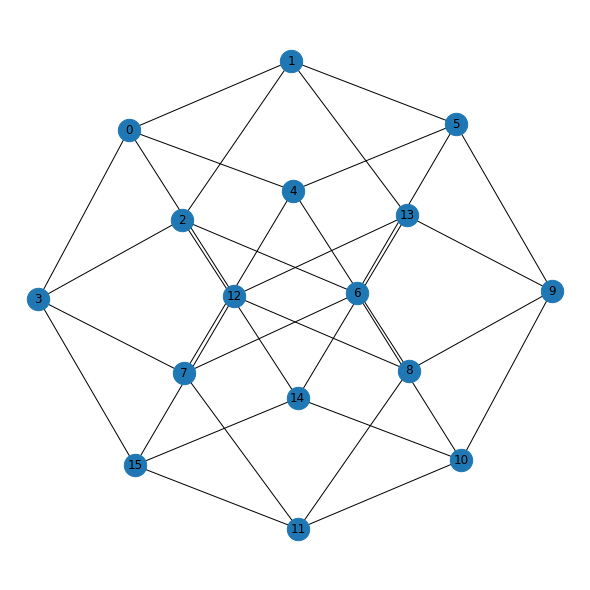

In [124]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)
betas_fast = np.arange(1e-6,10.1,3e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [125]:
imp.reload(solvers)
import model
imp.reload(model)
model_2d_h0_spinglass = model.model(N, H, J, J_interaction)
res_ex_2d_h0_spinglass = solvers.exact_sol(model_2d_h0_spinglass, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2.57e-06 M: 0.0 S: 0.6937
beta: 0.3, Fe: -2.675 Energy: -0.694 M: 0.0 S: 0.59442.871
beta: 0.6, Fe: -1.804 Energy: -1.12 M: 4.39e-16 S: 0.40986
beta: 0.9, Fe: -1.611 Energy: -1.3 M: 1.24e-15 S: 0.287.70
beta: 1.2, Fe: -1.543 Energy: -1.37 M: 6.11e-16 S: 0.21661
beta: 1.5, Fe: -1.512 Energy: -1.4 M: 9.16e-16 S: 0.167117
beta: 1.8, Fe: -1.495 Energy: -1.42 M: 3.31e-16 S: 0.13985
beta: 2.1, Fe: -1.484 Energy: -1.43 M: 2.43e-16 S: 0.11874
beta: 2.4, Fe: -1.478 Energy: -1.43 M: 1.64e-16 S: 0.1056
beta: 2.7, Fe: -1.473 Energy: -1.44 M: 1.7e-16 S: 0.094853
beta: 3.0, Fe: -1.470 Energy: -1.44 M: 1.57e-16 S: 0.08793
beta: 3.3, Fe: -1.467 Energy: -1.44 M: 7.52e-17 S: 0.0828
beta: 3.6, Fe: -1.465 Energy: -1.44 M: 1.76e-16 S: 0.07942
beta: 3.9, Fe: -1.463 Energy: -1.44 M: 8.26e-17 S: 0.07642
beta: 4.2, Fe: -1.462 Energy: -1.44 M: 7.64e-17 S: 0.07352
beta: 4.5, Fe: -1.461 Energy: -1.45 M: 7.4e-17 S: 0.07144
beta: 4.8, Fe: -1.460 Energy: -1.45 M: 1.91e-17 S: 0.069

In [126]:
imp.reload(solvers)
import solvers

res_nn_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_2d_h0_spinglass["name"]="nn"

fe: -693077.787 std_fe: 3.07E+03 M: 0.011 S: 0.693 E: 0.000, M: 0.0263, B1 = 0.01113
fe: -2.640 std_fe: 1.15E-01 M: 0.008 S: 0.610 E: -0.607 0.0347, B1 = -0.011
fe: -1.721 std_fe: 1.00E-01 M: 0.004 S: 0.356 E: -1.127 0.0322, B1 = 0.0310
fe: -1.576 std_fe: 3.42E-02 M: 0.012 S: 0.203 E: -1.350 0.0209, B1 = 0.00662
fe: -1.528 std_fe: 1.41E-02 M: 0.019 S: 0.155 E: -1.399 0.0307, B1 = -0.0150
fe: -1.504 std_fe: 7.31E-03 M: 0.005 S: 0.128 E: -1.419 0.00762, B1 = -0.005
fe: -1.491 std_fe: 4.15E-03 M: 0.005 S: 0.113 E: -1.428 0.0193, B1 = 0.00213
fe: -1.482 std_fe: 3.68E-03 M: 0.004 S: 0.101 E: -1.434 0.0158, B1 = 0.00472
fe: -1.477 std_fe: 1.65E-03 M: 0.007 S: 0.092 E: -1.438 0.0186, B1 = 0.00742
fe: -1.473 std_fe: 2.09E-04 M: 0.006 S: 0.087 E: -1.441 0.0161, B1 = -0.0012
fe: -1.469 std_fe: 7.59E-03 M: 0.011 S: 0.083 E: -1.442 0.05, B1 = 0.0020220
fe: -1.467 std_fe: 3.24E-03 M: 0.026 S: 0.080 E: -1.443 0.0015, B1 = -0.0017
fe: -1.465 std_fe: 2.13E-04 M: 0.009 S: 0.077 E: -1.444 0.00475, B1 = 

In [127]:
res_nn_z2_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2_2d_h0_spinglass["name"]="nn_z2"

fe: -693084.274 std_fe: 2.53E+03 M: 0.009 S: 0.693 E: -0.004 M: 0.0366, B1 = -0.038
fe: -2.663 std_fe: 6.64E-02 M: 0.009 S: 0.592 E: -0.690 0.0198, B1 = -0.5729
fe: -1.789 std_fe: 4.77E-02 M: 0.009 S: 0.397 E: -1.128 0.0164, B1 = -1.6392
fe: -1.604 std_fe: 2.04E-02 M: 0.006 S: 0.262 E: -1.313 0.0207, B1 = -3.1410
fe: -1.540 std_fe: 6.63E-03 M: 0.009 S: 0.198 E: -1.374 0.0129, B1 = -4.2756
fe: -1.510 std_fe: 2.77E-03 M: 0.009 S: 0.158 E: -1.405 0.0241, B1 = -5.6140
fe: -1.494 std_fe: 2.81E-03 M: 0.002 S: 0.133 E: -1.420 0.0258, B1 = -6.9235
fe: -1.484 std_fe: 4.24E-03 M: 0.002 S: 0.115 E: -1.429 0.0389, B1 = -8.1478
fe: -1.478 std_fe: 4.27E-04 M: 0.003 S: 0.102 E: -1.435 0.00538, B1 = -9.043
fe: -1.473 std_fe: 4.39E-04 M: 0.002 S: 0.093 E: -1.439 0.0269, B1 = -9.88541
fe: -1.470 std_fe: 1.97E-03 M: 0.005 S: 0.088 E: -1.440 0.0215, B1 = -10.3675
fe: -1.467 std_fe: 6.85E-04 M: 0.004 S: 0.082 E: -1.442 0.0191, B1 = -10.8678
fe: -1.465 std_fe: 1.20E-04 M: 0.001 S: 0.078 E: -1.443 0.00662, B

In [128]:
imp.reload(solvers)
res_bp_2d_h0_spinglass = solvers.bp_sol(model_2d_h0_spinglass, betas_fast)
res_bp_2d_h0_spinglass["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -2.675, ener: -0.691, M: 0.000, iter 13
fe: -1.798, ener: -1.108, M: 0.000, iter 54
fe: -1.635, ener: -1.351, M: 0.053, iter 1000
fe: -1.725, ener: -1.336, M: 0.048, iter 1000
fe: -1.745, ener: -1.362, M: 0.094, iter 1000
fe: -1.750, ener: -1.353, M: 0.102, iter 1000
fe: -1.751, ener: -1.352, M: 0.112, iter 1000
fe: -1.731, ener: -1.354, M: 0.107, iter 1000
fe: -1.710, ener: -1.344, M: 0.140, iter 1000
fe: -1.721, ener: -1.337, M: 0.157, iter 1000
fe: -1.774, ener: -1.377, M: 0.011, iter 1000
fe: -1.715, ener: -1.349, M: 0.115, iter 1000
fe: -1.708, ener: -1.346, M: 0.185, iter 1000
fe: -1.750, ener: -1.335, M: 0.183, iter 1000
fe: -1.717, ener: -1.336, M: 0.147, iter 1000
fe: -1.797, ener: -1.375, M: 0.024, iter 1000
fe: -1.685, ener: -1.339, M: 0.137, iter 1000
fe: -1.716, ener: -1.335, M: 0.143, iter 1000
fe: -1.796, ener: -1.377, M: 0.010, iter 1000
fe: -1.457, ener: -1.415, M: 0.136, iter 1000
fe: -1.555, ener: -1.583, M: 0.091, 

./python_lib/bp_solver.py:150: RuntimeWarning: divide by zero encountered in log
  S_i_temp = p_i_p * np.log(p_i_p) + p_i_m * np.log(p_i_m)
./python_lib/bp_solver.py:150: RuntimeWarning: invalid value encountered in double_scalars
  S_i_temp = p_i_p * np.log(p_i_p) + p_i_m * np.log(p_i_m)
./python_lib/bp_solver.py:168: RuntimeWarning: divide by zero encountered in log
  S_ij_temp += (p_m / norm_ij) * np.log(p_m / norm_ij)
./python_lib/bp_solver.py:168: RuntimeWarning: invalid value encountered in double_scalars
  S_ij_temp += (p_m / norm_ij) * np.log(p_m / norm_ij)
./python_lib/bp_solver.py:170: RuntimeWarning: divide by zero encountered in log
  S_ij_temp += (m_m / norm_ij) * np.log(m_m / norm_ij)
./python_lib/bp_solver.py:170: RuntimeWarning: invalid value encountered in double_scalars
  S_ij_temp += (m_m / norm_ij) * np.log(m_m / norm_ij)


fe: -1.475, ener: -1.371, M: 0.129, iter 1000
fe: -1.467, ener: -1.436, M: 0.072, iter 1000
fe: -1.556, ener: -1.524, M: 0.125, iter 1000


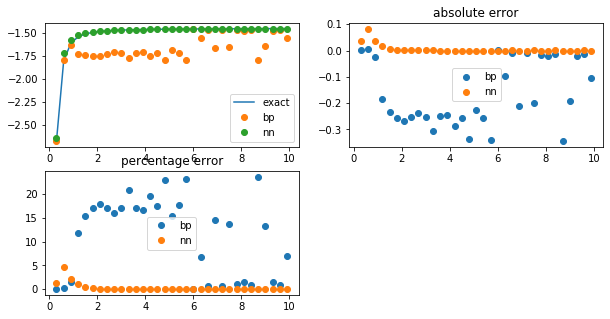

In [139]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass],
                           init_=1)
#plt.ylim(-0.1,0.11)
plt.show()

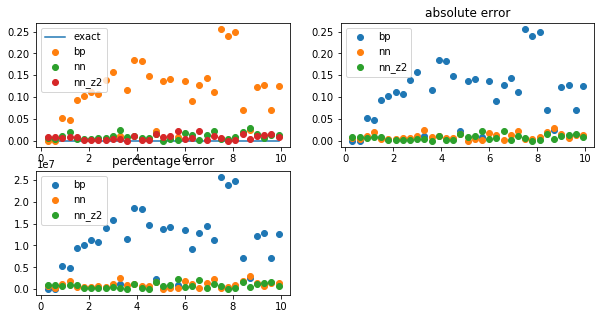

In [140]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass],
                          init_=1)
plt.show()

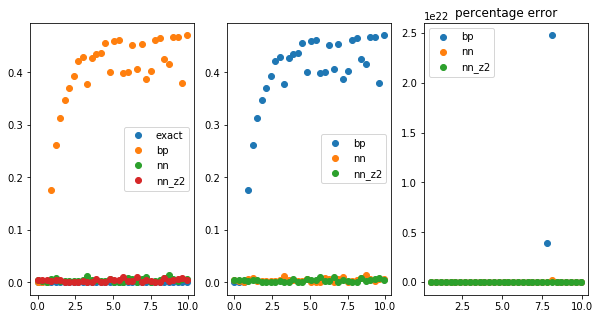

In [131]:
%matplotlib inline
imp.reload(solvers)
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass])
plt.show()

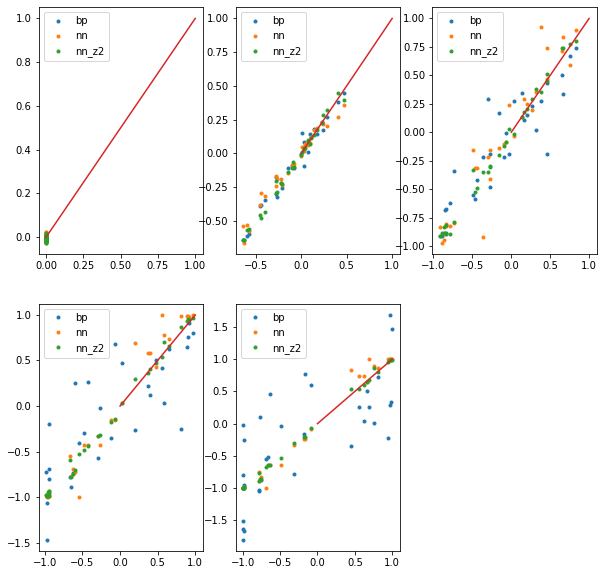

In [132]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[5:10], res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass], J_interaction)
plt.show()

# With random field

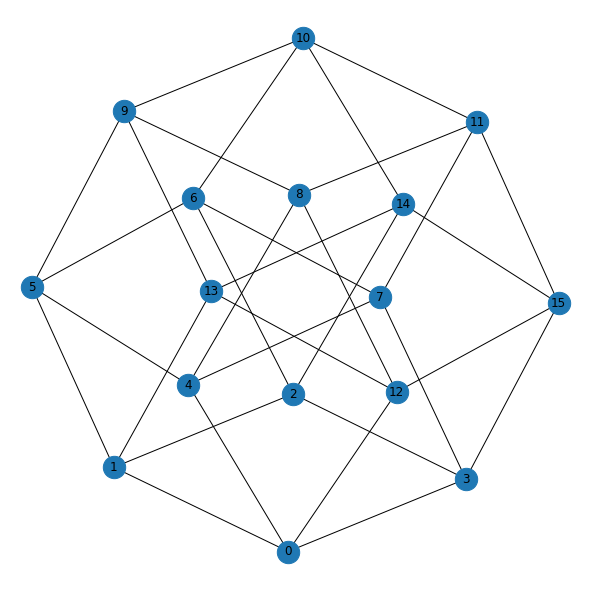

In [133]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
H_intes = 5
H = 2. * H_intes * np.random.random(N) - H_intes
#H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [134]:

model_rf = model.model(N, H, J, J_interaction)

res_ex_rf = solvers.exact_sol(model_rf, betas_fast)

res_nn_rf = solvers.nn_sol(model_rf, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rf["name"]="nn"

res_bp_rf= solvers.bp_sol(model_rf, betas_fast)
res_bp_rf["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -1.03e-05 M: 2.27e-06 S: 0.693
beta: 0.1, Fe: -7.415 Energy: -0.924 M: 0.216 S: 0.64919e+0222
beta: 0.2, Fe: -4.340 Energy: -1.56 M: 0.39 S: 0.557-69.42
beta: 0.3, Fe: -3.483 Energy: -1.95 M: 0.522 S: 0.46155.77
beta: 0.4, Fe: -3.129 Energy: -2.17 M: 0.615 S: 0.38350.10
beta: 0.5, Fe: -2.952 Energy: -2.3 M: 0.675 S: 0.32547.221
beta: 0.6, Fe: -2.851 Energy: -2.38 M: 0.715 S: 0.28445.66
beta: 0.7, Fe: -2.787 Energy: -2.42 M: 0.742 S: 0.25444.66
beta: 0.8, Fe: -2.743 Energy: -2.45 M: 0.761 S: 0.23243.99
beta: 0.9, Fe: -2.712 Energy: -2.47 M: 0.775 S: 0.21643.44
beta: 1.0, Fe: -2.689 Energy: -2.49 M: 0.786 S: 0.20343.00
beta: 1.1, Fe: -2.671 Energy: -2.5 M: 0.794 S: 0.19342.777
beta: 1.2, Fe: -2.657 Energy: -2.5 M: 0.801 S: 0.185-42.55
beta: 1.3, Fe: -2.645 Energy: -2.51 M: 0.806 S: 0.17742.33
beta: 1.4, Fe: -2.635 Energy: -2.51 M: 0.811 S: 0.17142.22
beta: 1.5, Fe: -2.627 Energy: -2.52 M: 0.815 S: 0.16642.00
beta: 1.6, Fe: -2.621 Energy: -2.52 M: 0.818 

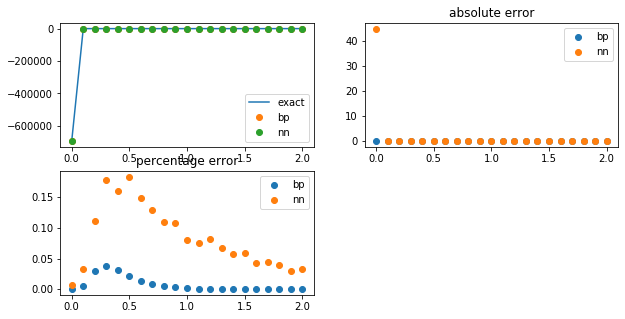

In [135]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf])
#plt.ylim(-0.01,0.01)
plt.show()

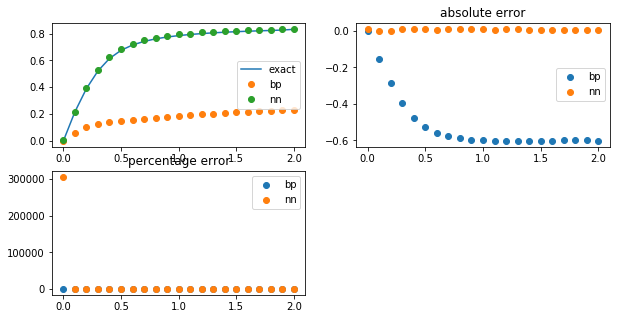

In [136]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf])
plt.show()

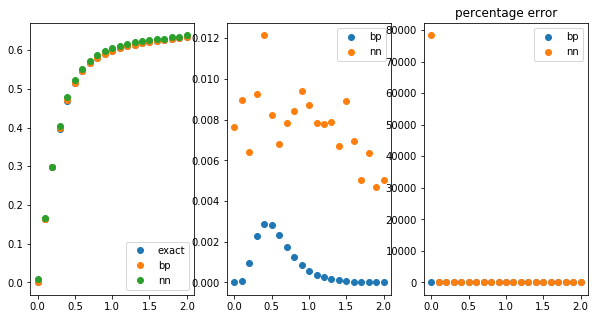

In [137]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_rf, [res_bp_rf, res_nn_rf])
plt.legend()
plt.show()

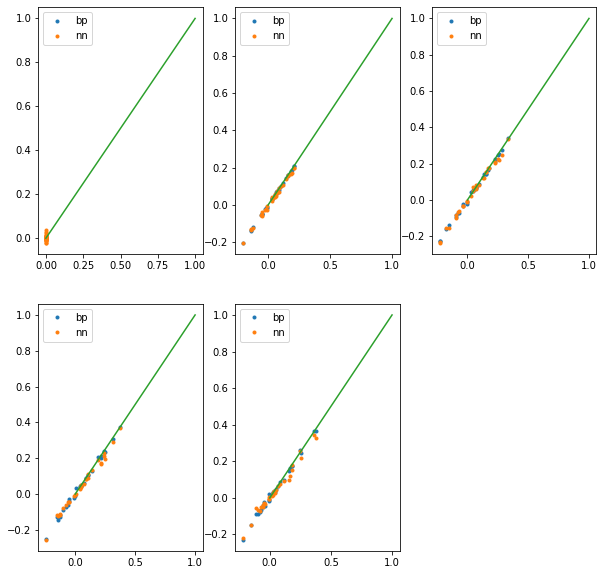

In [138]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[5:10], res_ex_rf, [res_bp_rf, res_nn_rf], J_interaction)
plt.show()

# J +-1

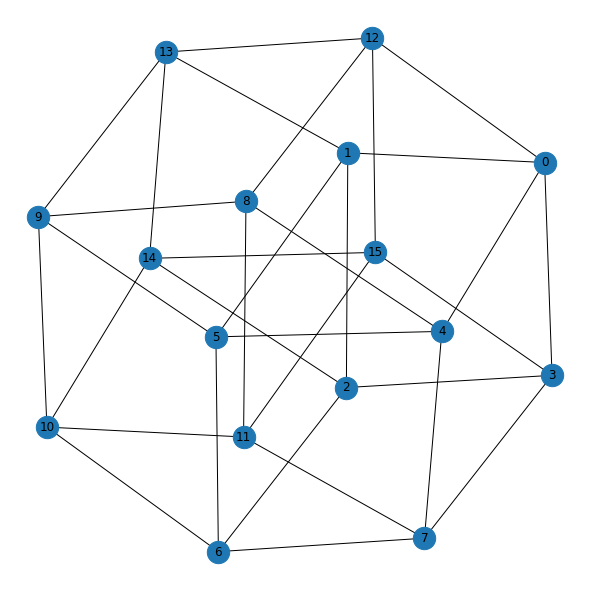

In [113]:
import graph_gen
import imp
imp.reload(graph_gen)
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass_one()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [114]:
model_j1 = model.model(N, H, J, J_interaction)
res_ex_j1 = solvers.exact_sol(model_j1, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2e-06 M: 0.0 S: 0.693077
beta: 0.1, Fe: -7.032 Energy: -0.201 M: 0.0 S: 0.6831.12e+022
beta: 0.2, Fe: -3.667 Energy: -0.406 M: 0.0 S: 0.65258.65
beta: 0.3, Fe: -2.615 Energy: -0.613 M: 0.0 S: 0.6011.8.8
beta: 0.4, Fe: -2.139 Energy: -0.809 M: 8.25e-18 S: 0.532
beta: 0.5, Fe: -1.890 Energy: -0.975 M: 1.85e-17 S: 0.457
beta: 0.6, Fe: -1.749 Energy: -1.1 M: 1.29e-16 S: 0.38800
beta: 0.7, Fe: -1.663 Energy: -1.19 M: 5.15e-17 S: 0.3316
beta: 0.8, Fe: -1.608 Energy: -1.25 M: 2.54e-15 S: 0.2867
beta: 0.9, Fe: -1.571 Energy: -1.29 M: 6.1e-17 S: 0.25111
beta: 1.0, Fe: -1.544 Energy: -1.32 M: 1.32e-16 S: 0.2257
beta: 1.1, Fe: -1.525 Energy: -1.34 M: 2.13e-17 S: 0.2064
beta: 1.2, Fe: -1.510 Energy: -1.35 M: 7.64e-16 S: 0.1922
beta: 1.3, Fe: -1.498 Energy: -1.36 M: 1.24e-15 S: 0.1820
beta: 1.4, Fe: -1.488 Energy: -1.36 M: 2.3e-17 S: 0.17488
beta: 1.5, Fe: -1.480 Energy: -1.37 M: 2.38e-17 S: 0.1697
beta: 1.6, Fe: -1.473 Energy: -1.37 M: 2.43e-17 S: 0.1656
beta: 1

In [115]:
res_nn_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=500, 
                        bias = True, 
                        lr=0.01,
                        batch_size=1000,
                        z2 = False, x_hat_clip = False, stats=10)
res_nn_j1["name"]="nn"

fe: -692545.405 std_fe: 4.44E+03 M: 0.250 S: 0.693 E: 0.200 M: 0.0262, B1 = -0.02115
fe: -7.026 std_fe: 2.89E-02 M: 0.287 S: 0.680 E: -0.225 0.0263, B1 = -0.003
fe: -3.664 std_fe: 5.23E-02 M: 0.188 S: 0.643 E: -0.450 0.0213, B1 = 0.0030
fe: -2.568 std_fe: 8.58E-02 M: 0.275 S: 0.583 E: -0.625 0.03, B1 = 0.006051
fe: -2.110 std_fe: 8.89E-02 M: 0.275 S: 0.564 E: -0.700 0.0182, B1 = 0.0211
fe: -1.887 std_fe: 1.25E-01 M: 0.213 S: 0.531 E: -0.825 0.0267, B1 = -0.021
fe: -1.695 std_fe: 5.78E-02 M: 0.350 S: 0.417 E: -1.000 0.0189, B1 = 0.0101
fe: -1.611 std_fe: 9.84E-02 M: 0.138 S: 0.323 E: -1.150 0.0511, B1 = -0.0157
fe: -1.566 std_fe: 2.97E-02 M: 0.400 S: 0.213 E: -1.300 0.028, B1 = 0.021194
fe: -1.568 std_fe: 5.33E-02 M: 0.450 S: 0.174 E: -1.375 0.0228, B1 = 0.00604
fe: -1.505 std_fe: 4.49E-02 M: 0.338 S: 0.155 E: -1.350 0.024, B1 = 0.009811
fe: -1.524 std_fe: 5.80E-02 M: 0.125 S: 0.219 E: -1.325 0.0265, B1 = -0.0160
fe: -1.489 std_fe: 1.90E-02 M: 0.375 S: 0.167 E: -1.350 0.0521, B1 = 0.027

In [116]:
imp.reload(solvers)
import bp_solver
imp.reload(bp_solver)
res_bp_j1 = solvers.bp_sol(model_j1, betas_fast, error=1e-4, )
res_bp_j1["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 2
fe: -7.031, ener: -0.199, M: 0.000, iter 6
fe: -3.664, ener: -0.395, M: 0.000, iter 8
fe: -2.606, ener: -0.583, M: 0.000, iter 10
fe: -2.123, ener: -0.760, M: 0.000, iter 15
fe: -1.867, ener: -0.924, M: 0.000, iter 27
fe: -1.722, ener: -1.074, M: 0.000, iter 79
fe: -1.640, ener: -1.182, M: 0.016, iter 1000
fe: -1.559, ener: -1.181, M: 0.141, iter 1000
fe: -1.539, ener: -1.411, M: 0.126, iter 1000
fe: -1.488, ener: -1.257, M: 0.191, iter 1000
fe: -1.686, ener: -1.552, M: 0.095, iter 1000
fe: -1.470, ener: -1.386, M: 0.072, iter 1000
fe: -1.467, ener: -1.369, M: 0.001, iter 1000
fe: -1.469, ener: -1.463, M: 0.060, iter 1000
fe: -1.488, ener: -1.577, M: 0.157, iter 1000
fe: -1.444, ener: -1.419, M: 0.075, iter 1000
fe: -1.547, ener: -1.428, M: 0.087, iter 1000
fe: -1.588, ener: -1.596, M: 0.123, iter 1000
fe: -1.586, ener: -1.573, M: 0.173, iter 1000
fe: -1.380, ener: -1.471, M: 0.229, iter 1000


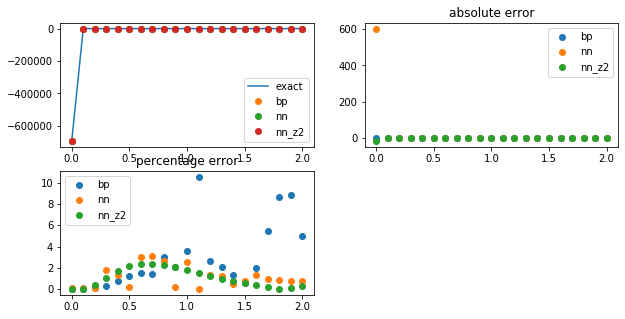

In [117]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

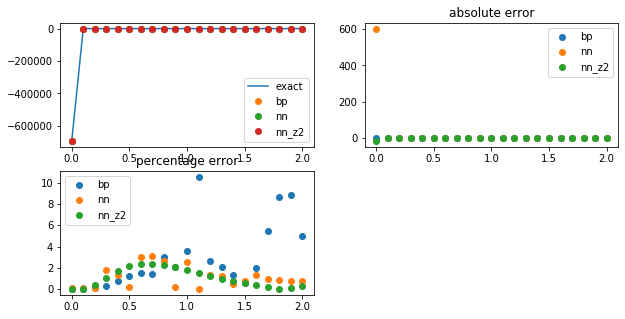

In [118]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

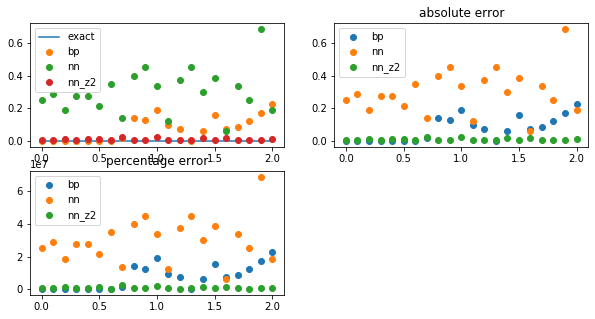

In [119]:
%matplotlib inline
label="M"
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

ValueError: operands could not be broadcast together with shapes (21,9) (21,16) 

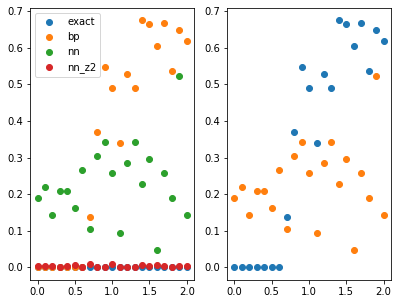

In [120]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
plt.legend()
plt.show()